In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [33]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# Stop Words Of English

print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [35]:
dataset = pd.read_csv("WELFake_Dataset.csv")

In [36]:
print(dataset.head())
print(dataset.shape)

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
(72134, 4)


In [37]:
print(dataset.isnull().sum())

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [38]:
dataset = dataset.fillna('')

print(dataset.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


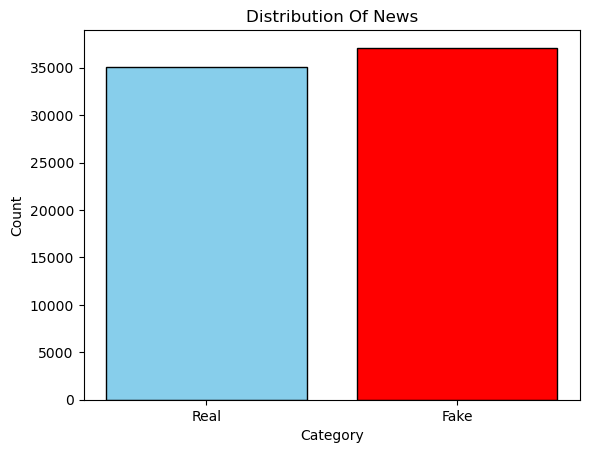

In [39]:
counts = [sum(np.array(dataset["label"].values == 0)), sum(np.array(dataset["label"].values == 1))]
labels = ["Real", "Fake"]
colors = ["skyblue", "red"]

plt.bar(labels, counts, color = colors, edgecolor = "black")
plt.title("Distribution Of News")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [40]:
dataset["content"] = dataset["title"] + " " + dataset["text"]


dataset = dataset.iloc[0:15000]

In [41]:
port_stem = PorterStemmer()

def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words("english")]
  stemmed_content = " ".join(stemmed_content)

  return stemmed_content

In [42]:
dataset["content"] = dataset["content"].apply(stemming)

In [43]:
print(dataset["content"][0])

law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video comment expect barack obama member fyf fukyoflag blacklivesmatt movement call lynch hang white peopl cop encourag other radio show tuesday night turn tide kill white peopl cop send messag kill black peopl america one f yoflag organ call sunshin radio blog show host texa call sunshin f ing opinion radio show snapshot fyf lolatwhitefear twitter page p show urg support call fyf tonight continu dismantl illus white snapshot twitter radio call invit fyf radio show air p eastern standard time show caller clearli call lynch kill white peopl minut clip radio show heard provid breitbart texa someon would like refer hannib alreadi receiv death threat result interrupt fyf confer call unidentifi black man said mother f ker start f ing like us bunch ni er takin one us roll said caus alreadi roll gang anyway six seven black mother f cker see white person lynch ass let turn tabl conspir cop start lose peopl state emerg s

In [44]:
x = dataset["content"].values
y = dataset["label"].values

print(x)
print(y)

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video comment expect barack obama member fyf fukyoflag blacklivesmatt movement call lynch hang white peopl cop encourag other radio show tuesday night turn tide kill white peopl cop send messag kill black peopl america one f yoflag organ call sunshin radio blog show host texa call sunshin f ing opinion radio show snapshot fyf lolatwhitefear twitter page p show urg support call fyf tonight continu dismantl illus white snapshot twitter radio call invit fyf radio show air p eastern standard time show caller clearli call lynch kill white peopl minut clip radio show heard provid breitbart texa someon would like refer hannib alreadi receiv death threat result interrupt fyf confer call unidentifi black man said mother f ker start f ing like us bunch ni er takin one us roll said caus alreadi roll gang anyway six seven black mother f cker see white person lynch ass let turn tabl conspir cop start lose peopl state emerg

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 42)

In [46]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Initalize Models

logistic_clf = LogisticRegression(max_iter = 1000)
nb_clf = MultinomialNB()
svm_clf = LinearSVC()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
knn_clf = KNeighborsClassifier()
xgb_clf = xgb.XGBClassifier(eval_metric = "logloss")
lgb_clf = lgb.LGBMClassifier(objective = "binary")

In [49]:
logistic_clf.fit(x_train, y_train)
nb_clf.fit(x_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [58]:
svm_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
xgb_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [53]:
gb_clf.fit(x_train, y_train)
lgb_clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 5503, number of negative: 4997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.501293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 470736
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 8003
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524095 -> initscore=0.096456
[LightGBM] [Info] Start training from score 0.096456


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [59]:
# Predictions Of Each Model

logistic_pred = logistic_clf.predict(x_test)
nb_pred = nb_clf.predict(x_test)
svm_pred = svm_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)
xgb_pred = xgb_clf.predict(x_test)
knn_pred = knn_clf.predict(x_test)
gb_pred = gb_clf.predict(x_test)
lgb_pred = lgb_clf.predict(x_test)

c:\ProgramData\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [60]:
# Accuracy Of Each Model

from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, logistic_pred)
nb_acc = accuracy_score(y_test, nb_pred)
svm_acc = accuracy_score(y_test, svm_pred)
rf_acc = accuracy_score(y_test, rf_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
knn_acc = accuracy_score(y_test, knn_pred)
gb_acc = accuracy_score(y_test, gb_pred)
lgb_acc = accuracy_score(y_test, lgb_pred)

In [61]:
# Print Accuracy

print(f"Logistic Regression Accuracy: {logistic_acc}")
print(f"NB Accuracy:                  {nb_acc}")
print(f"SVM Accuracy:                 {svm_acc}")
print(f"Random Forest Accuracy:       {rf_acc}")
print(f"XGB Accuracy:                 {xgb_acc}")
print(f"KNN Accuracy:                 {knn_acc}")
print(f"Gradient Boosting Accuracy:   {gb_acc}")
print(f"LGB Accuracy:                 {lgb_acc}")

Logistic Regression Accuracy: 0.9273333333333333
NB Accuracy:                  0.8571111111111112
SVM Accuracy:                 0.9433333333333334
Random Forest Accuracy:       0.9062222222222223
XGB Accuracy:                 0.9544444444444444
KNN Accuracy:                 0.6042222222222222
Gradient Boosting Accuracy:   0.9422222222222222
LGB Accuracy:                 0.958


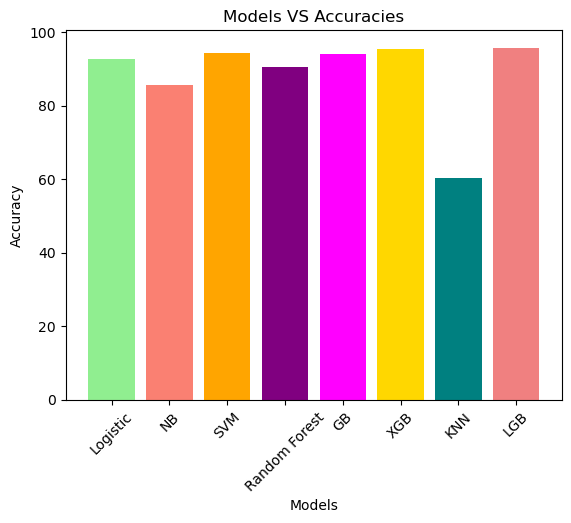

In [62]:
# Plot Accuracies

models = ["Logistic", "NB", "SVM", "Random Forest", "GB", "XGB", "KNN", "LGB"]
accuracies = [logistic_acc * 100, nb_acc * 100, svm_acc * 100, rf_acc * 100, gb_acc * 100, xgb_acc * 100, knn_acc * 100, lgb_acc * 100]
colors = ["lightgreen", "salmon", "orange", "purple", "magenta", "gold", "teal", "lightcoral"]

plt.bar(models, accuracies, color = colors)

plt.title("Models VS Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation = 45)
plt.show()

In [71]:
# Print Precisions

from sklearn.metrics import precision_score

logistic_pr = precision_score(y_test, logistic_pred)
nb_pr = precision_score(y_test, nb_pred)
svm_pr = precision_score(y_test, svm_pred)
rf_pr = precision_score(y_test, rf_pred)
xgb_pr = precision_score(y_test, xgb_pred)
knn_pr = precision_score(y_test, knn_pred)
gb_pr = precision_score(y_test, gb_pred)
lgb_pr = precision_score(y_test, lgb_pred)

print(f"Logistic Regression Precision: {logistic_acc}")
print(f"NB Precision:                  {nb_acc}")
print(f"SVM Precision:                 {svm_acc}")
print(f"Random Forest Precision:       {rf_acc}")
print(f"XGB Precision:                 {xgb_acc}")
print(f"KNN Precision:                 {knn_acc}")
print(f"Gradient Boosting Precision:   {gb_acc}")
print(f"LGB Precision:                 {lgb_acc}")

Logistic Regression Precision: 0.9273333333333333
NB Precision:                  0.8571111111111112
SVM Precision:                 0.9433333333333334
Random Forest Precision:       0.9062222222222223
XGB Precision:                 0.9544444444444444
KNN Precision:                 0.6042222222222222
Gradient Boosting Precision:   0.9422222222222222
LGB Precision:                 0.958


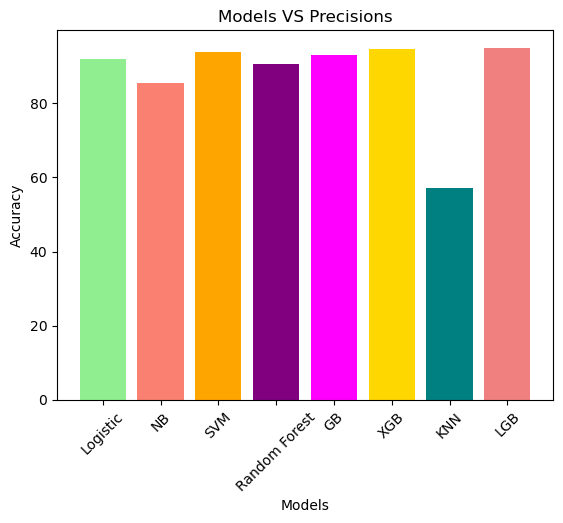

In [73]:
# Plot Precisions

models = ["Logistic", "NB", "SVM", "Random Forest", "GB", "XGB", "KNN", "LGB"]
accuracies = [logistic_pr * 100, nb_pr * 100, svm_pr * 100, rf_pr * 100, gb_pr * 100, xgb_pr * 100, knn_pr * 100, lgb_pr * 100]
colors = ["lightgreen", "salmon", "orange", "purple", "magenta", "gold", "teal", "lightcoral"]

plt.bar(models, accuracies, color = colors)

plt.title("Models VS Precisions")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation = 45)
plt.show()

In [68]:
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV

svm_clf = CalibratedClassifierCV(svm_clf)

ensemble_clf = VotingClassifier(
	estimators = [
		("svm", svm_clf),
		("xgb", xgb_clf),
		("lgb", lgb_clf),
		("gb", gb_clf),
	],
	voting = "soft",
	weights = [svm_acc, xgb_acc, lgb_acc, gb_acc]
)

ensemble_clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 5503, number of negative: 4997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.450909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 470736
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 8003
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524095 -> initscore=0.096456
[LightGBM] [Info] Start training from score 0.096456


,estimators,"[('svm', ...), ('xgb', ...), ...]"
,voting,'soft'
,weights,"[0.9433333333333334, 0.9544444444444444, ...]"
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0


In [74]:
# Evaluate The model

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

y_pred = ensemble_clf.predict(x_test)

ensemble_cm = confusion_matrix(y_test, y_pred)
ensemble_ac = accuracy_score(y_test, y_pred)
ensemble_rc = recall_score(y_test, y_pred)
ensemble_pr = precision_score(y_test, y_pred)
ensemble_f1 = f1_score(y_test, y_pred)

print(f"Confusion Matrix:\n {ensemble_cm}")
print(f"Accuracy:  {ensemble_ac}")
print(f"Recall:    {ensemble_rc}")
print(f"Precision: {ensemble_pr}")
print(f"F1-Score:  {ensemble_f1}")

Confusion Matrix:
 [[2022  120]
 [  67 2291]]
Accuracy:  0.9584444444444444
Recall:    0.9715860899067006
Precision: 0.950228121111572
F1-Score:  0.9607884252463829


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [75]:
import pickle

with open("ensemble_clf.pkl", "wb") as f:
  pickle.dump(ensemble_clf, f)

with open("vectorizer.pkl", "wb") as f:
  pickle.dump(vectorizer, f)